In [ ]:
#Step -1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set to display all the columns of the dataset
pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

Data Class Proportions:
Normal: 621 OSCC: 2032


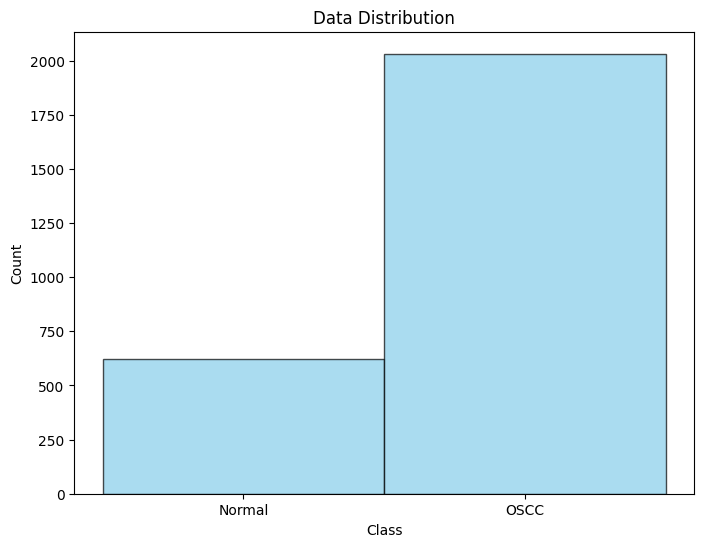

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define constants
data_path = r"/home/l2-49/Downloads/ARVIND/oral-combined-dataset"  # Updated path
target_size = (224, 224)  # Define the target size for resizing

# Function to load and preprocess images from a given folder
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label to the labels list
        labels.append(label)
    return images, labels

# Load and preprocess data for NORMAL and OSCC classes
all_images = []
all_labels = []

# Loop through each class (NORMAL and OSCC)
for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    images, labels = load_images_from_folder(class_path, 0 if class_name == 'NORMAL' else 1)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert data to NumPy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Print class proportions
print("Data Class Proportions:")
print("Normal:", np.sum(all_labels == 0), "OSCC:", np.sum(all_labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(all_labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Normal', 'OSCC'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()


Balanced Images: (1200, 224, 224)
Balanced Labels: (1200,)
Normal Images: (600, 224, 224)
OSCC Images: (600, 224, 224)
X_train shape: (960, 224, 224)
X_test shape: (240, 224, 224)
y_train shape: (960,)
y_test shape: (240,)


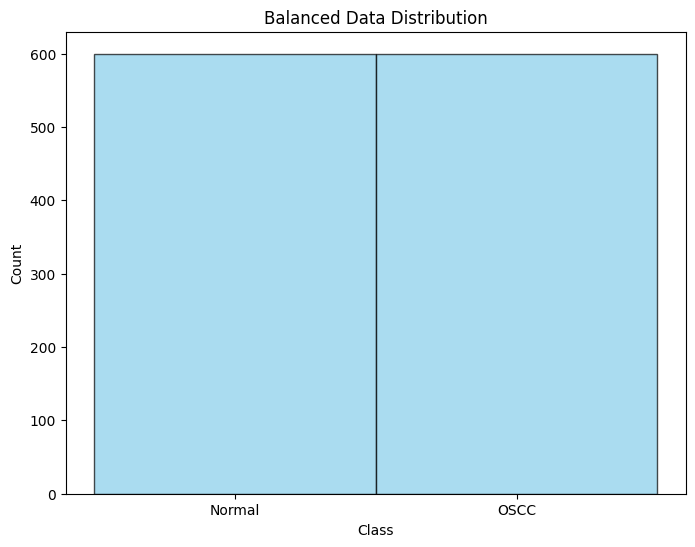

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = "/home/l2-49/Downloads/ARVIND/oral-combined-dataset"  # Updated path
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (NORMAL and OSCC)
for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for NORMAL, 1 for OSCC) to the labels list
        labels.append(0 if class_name == 'NORMAL' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Ensure dataset is balanced by selecting 600 images from each class
normal_images = images[labels == 0][:600]  # Select 600 images from NORMAL class
oscc_images = images[labels == 1][:600]    # Select 600 images from OSCC class
normal_labels = labels[labels == 0][:600]
oscc_labels = labels[labels == 1][:600]

# Concatenate the normal and OSCC images and labels to create a balanced dataset
balanced_images = np.concatenate([normal_images, oscc_images])
balanced_labels = np.concatenate([normal_labels, oscc_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Print the balanced data
print("Balanced Images:", balanced_images.shape)
print("Balanced Labels:", balanced_labels.shape)

# Print the data separately for each class
print("Normal Images:", normal_images.shape)
print("OSCC Images:", oscc_images.shape)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Plot histogram for the balanced class distribution
plt.figure(figsize=(8, 6))
plt.hist(balanced_labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Normal', 'OSCC'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Balanced Data Distribution')
plt.show()


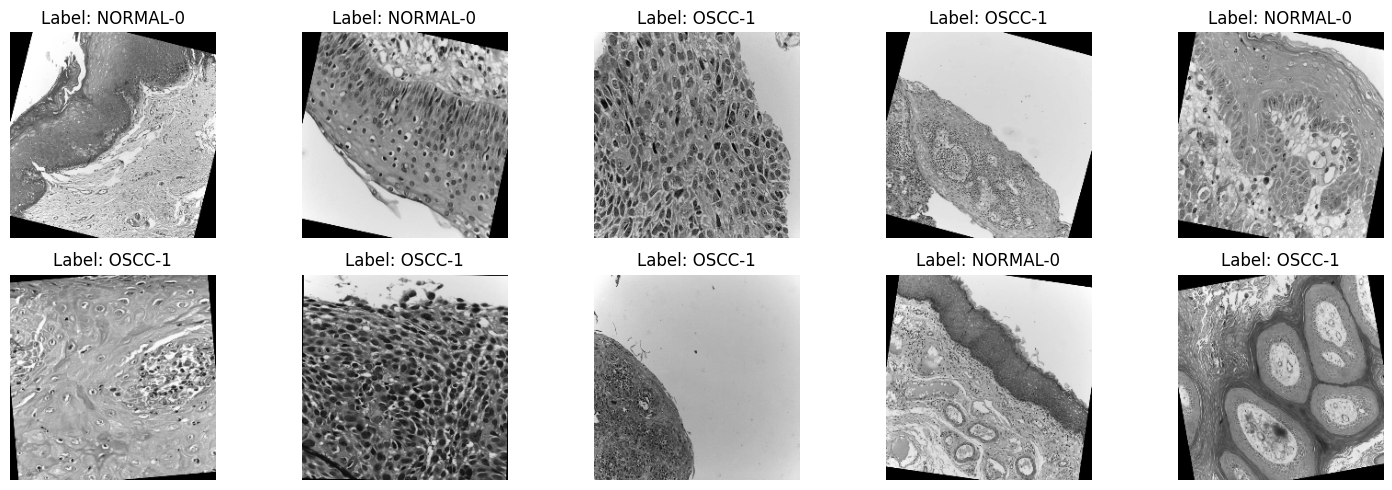

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Define the label text for display as "NORMAL-0" or "OSCC-1"
    label_text = 'NORMAL-0' if label == 0 else 'OSCC-1'

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label_text}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


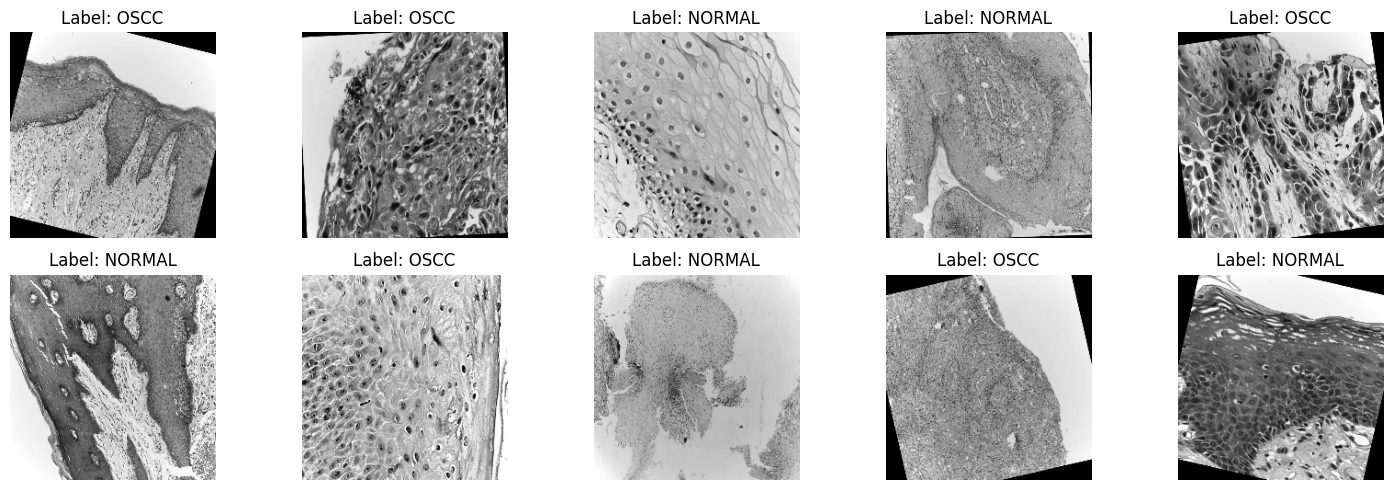

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Define the label text for display as "NORMAL" or "OSCC"
    label_text = 'NORMAL' if label == 0 else 'OSCC'

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label_text}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


# ResNet model

# Dense Layers

2024-11-15 17:25:48.569863: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-15 17:25:48.733339: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-15 17:25:48.802770: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-15 17:25:48.822845: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-15 17:25:48.943885: I tensorflow/core/platform/cpu_feature_guar

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,968,961 (285.98 MB)

 Trainable params: 51,381,249 (196.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 911ms/step - accuracy: 0.5070 - auc: 0.5234 - auc_1: 0.5372 - false_negatives: 129.9032 - false_positives: 120.8064 - loss: 7.3096 - precision: 0.5021 - recall: 0.4757 - true_negatives: 131.9355 - true_positives: 128.3226 - val_accuracy: 0.5583 - val_auc: 0.5447 - val_auc_1: 0.5611 - val_false_negatives: 91.0000 - val_false_positives: 15.0000 - val_loss: 0.6944 - val_precision: 0.6429 - val_recall: 0.2288 - val_true_negatives: 107.0000 - val_true_positives: 27.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 895ms/step - accuracy: 0.5615 - auc: 0.5776 - auc_1: 0.5780 - false_negatives: 104.3871 - false_positives: 118.9677 - loss: 0.6821 - precision: 0.5749 - recall: 0.5989 - true_negatives: 132.6774 - true_positives: 154.9355 - val_accuracy: 0.5125 - val_auc: 0.5940 - val_auc_1: 0.6019 - val_false_negatives: 1.0000 - val_false_positives: 116.0000 - val_loss: 0.7301 - val_precision: 0.5021 - val_recall: 0.9915 - val_true_negatives: 6.0000 - val_tr

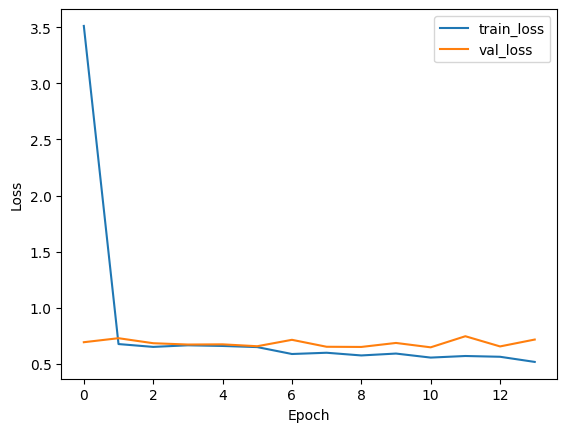

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 505ms/step - accuracy: 0.6349 - auc: 0.6360 - auc_1: 0.6036 - false_negatives: 25.1111 - false_positives: 30.2222 - loss: 0.6670 - precision: 0.5788 - recall: 0.6152 - true_negatives: 52.2222 - true_positives: 45.3333
Test Accuracy: 65.42%
Precision: 0.64
Recall: 0.67
AUC-ROC: 0.67
AUC-PR: 0.68
TN: 78.0, FP: 44.0, FN: 39.0, TP: 79.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 583ms/step
Confusion Matrix:
[[78 44]
 [39 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.64      0.65       122
           1       0.64      0.67      0.66       118

    accuracy                           0.65       240
   macro avg       0.65      0.65      0.65       240
weighted avg       0.65      0.65      0.65       240

AUC Score: 0.65
Precision: 0.64
Recall: 0.67
F1 Score: 0.66
PR AUC: 0.74
Cohen's Kappa Coefficient: 0.31
Matthews Correlation Coefficient (MCC): 0.31
Balanced Accuracy: 0.65
Time taken: 394.76 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Load pre-trained ResNet-50 model without the top layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False

# Define your own classification layers on top of ResNet
model = Sequential([
    resnet,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the CNN

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Start time
start_time = time.time()

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,968,961 (285.98 MB)

 Trainable params: 51,381,249 (196.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 949ms/step - accuracy: 0.4964 - auc_2: 0.5041 - auc_3: 0.5038 - false_negatives_1: 129.4516 - false_positives_1: 130.9677 - loss: 7.6538 - precision_1: 0.4799 - recall_1: 0.4859 - true_negatives_1: 124.6129 - true_positives_1: 125.9355 - val_accuracy: 0.4958 - val_auc_2: 0.5428 - val_auc_3: 0.5678 - val_false_negatives_1: 10.0000 - val_false_positives_1: 111.0000 - val_loss: 0.7371 - val_precision_1: 0.4932 - val_recall_1: 0.9153 - val_true_negatives_1: 11.0000 - val_true_positives_1: 108.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 917ms/step - accuracy: 0.5490 - auc_2: 0.5985 - auc_3: 0.6062 - false_negatives_1: 119.4839 - false_positives_1: 106.8064 - loss: 0.6875 - precision_1: 0.5536 - recall_1: 0.5081 - true_negatives_1: 148.0000 - true_positives_1: 136.6774 - val_accuracy: 0.5083 - val_auc_2: 0.6205 - val_auc_3: 0.6199 - val_false_negatives_1: 118.0000 - val_false_positives_1: 0.0000e+00 - val_loss: 0.7430 - val_precision_1: 0.0000e+

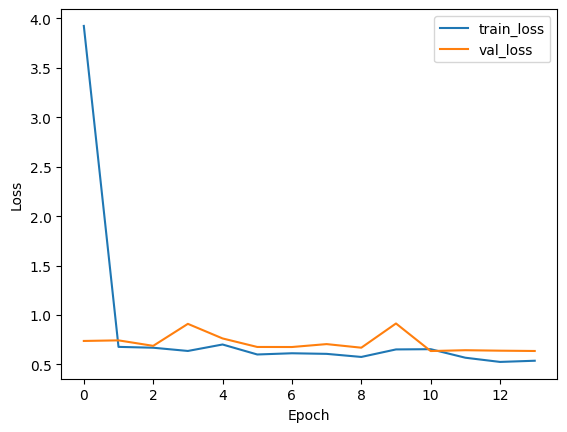

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 505ms/step - accuracy: 0.6474 - auc_2: 0.6679 - auc_3: 0.6327 - false_negatives_1: 23.4444 - false_positives_1: 30.7778 - loss: 0.6554 - precision_1: 0.5924 - recall_1: 0.6439 - true_negatives_1: 51.6667 - true_positives_1: 47.0000
Test Accuracy: 65.83%
Precision: 0.64
Recall: 0.69
AUC-ROC: 0.69
AUC-PR: 0.71
TN: 76.0, FP: 46.0, FN: 36.0, TP: 82.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 579ms/step
Confusion Matrix:
[[76 46]
 [36 82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       122
           1       0.64      0.69      0.67       118

    accuracy                           0.66       240
   macro avg       0.66      0.66      0.66       240
weighted avg       0.66      0.66      0.66       240

AUC Score: 0.66
Precision: 0.64
Recall: 0.69
F1 Score: 0.67
PR AUC: 0.74
Cohen's Kappa Coefficient: 0.32
Matthews Correlation Coefficient (MCC): 0.32
Balanced Accuracy: 0.66
Time taken: 396.68 seco

In [ ]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Load pre-trained ResNet-50 model without the top layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False

# Define your own classification layers on top of ResNet
model = Sequential([
    resnet,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the CNN

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Start time
start_time = time.time()

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,968,961 (285.98 MB)

 Trainable params: 51,381,249 (196.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 957ms/step - accuracy: 0.4814 - auc_4: 0.4897 - auc_5: 0.4896 - false_negatives_2: 136.9677 - false_positives_2: 122.9677 - loss: 7.8724 - precision_2: 0.4663 - recall_2: 0.4427 - true_negatives_2: 130.9677 - true_positives_2: 120.0645 - val_accuracy: 0.5042 - val_auc_4: 0.6034 - val_auc_5: 0.5988 - val_false_negatives_2: 3.0000 - val_false_positives_2: 116.0000 - val_loss: 1.0407 - val_precision_2: 0.4978 - val_recall_2: 0.9746 - val_true_negatives_2: 6.0000 - val_true_positives_2: 115.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 918ms/step - accuracy: 0.5824 - auc_4: 0.6258 - auc_5: 0.6389 - false_negatives_2: 98.9677 - false_positives_2: 120.1936 - loss: 0.9742 - precision_2: 0.5816 - recall_2: 0.6683 - true_negatives_2: 129.4194 - true_positives_2: 162.3871 - val_accuracy: 0.5625 - val_auc_4: 0.6611 - val_auc_5: 0.6614 - val_false_negatives_2: 96.0000 - val_false_positives_2: 9.0000 - val_loss: 0.7519 - val_precision_2: 0.7097 - val_rec

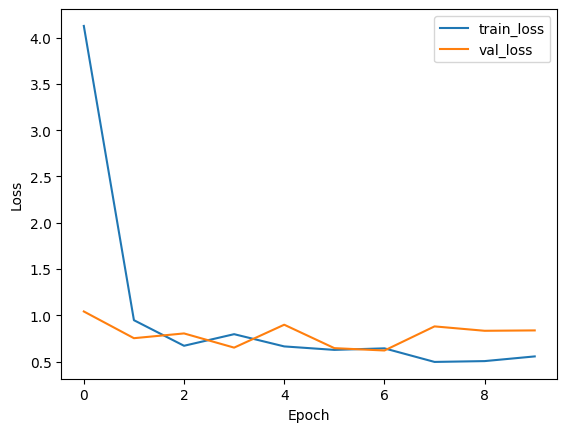

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 505ms/step - accuracy: 0.6594 - auc_4: 0.7158 - auc_5: 0.6777 - false_negatives_2: 28.4444 - false_positives_2: 24.2222 - loss: 0.6281 - precision_2: 0.6200 - recall_2: 0.5931 - true_negatives_2: 58.2222 - true_positives_2: 42.0000
Test Accuracy: 66.67%
Precision: 0.68
Recall: 0.61
AUC-ROC: 0.74
AUC-PR: 0.74
TN: 88.0, FP: 34.0, FN: 46.0, TP: 72.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 581ms/step
Confusion Matrix:
[[88 34]
 [46 72]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       122
           1       0.68      0.61      0.64       118

    accuracy                           0.67       240
   macro avg       0.67      0.67      0.67       240
weighted avg       0.67      0.67      0.67       240

AUC Score: 0.67
Precision: 0.68
Recall: 0.61
F1 Score: 0.64
PR AUC: 0.74
Cohen's Kappa Coefficient: 0.33
Matthews Correlation Coefficient (MCC): 0.33
Balanced Accuracy: 0.67
Time taken: 287.31 seco

In [ ]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Load pre-trained ResNet-50 model without the top layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False

# Define your own classification layers on top of ResNet
model = Sequential([
    resnet,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the CNN

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Start time
start_time = time.time()

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Dropout + Dense Layers

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,968,961 (285.98 MB)

 Trainable params: 51,381,249 (196.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 952ms/step - accuracy: 0.5145 - auc_6: 0.5210 - auc_7: 0.5484 - false_negatives_3: 130.8710 - false_positives_3: 114.5161 - loss: 8.5076 - precision_3: 0.5551 - recall_3: 0.4925 - true_negatives_3: 127.3871 - true_positives_3: 138.1935 - val_accuracy: 0.5000 - val_auc_6: 0.5432 - val_auc_7: 0.5050 - val_false_negatives_3: 3.0000 - val_false_positives_3: 117.0000 - val_loss: 1.0566 - val_precision_3: 0.4957 - val_recall_3: 0.9746 - val_true_negatives_3: 5.0000 - val_true_positives_3: 115.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 917ms/step - accuracy: 0.5589 - auc_6: 0.5789 - auc_7: 0.5921 - false_negatives_3: 103.6129 - false_positives_3: 126.9355 - loss: 0.8553 - precision_3: 0.5674 - recall_3: 0.6660 - true_negatives_3: 118.9355 - true_positives_3: 161.4839 - val_accuracy: 0.5083 - val_auc_6: 0.5556 - val_auc_7: 0.5098 - val_false_negatives_3: 118.0000 - val_false_positives_3: 0.0000e+00 - val_loss: 1.0870 - val_precision_3: 0.0000e+00 -

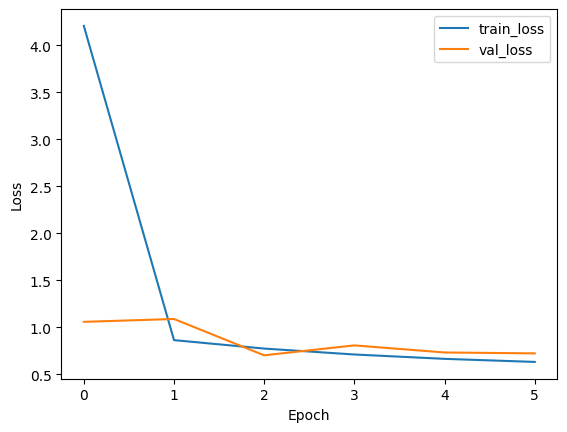

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 506ms/step - accuracy: 0.5327 - auc_6: 0.5280 - auc_7: 0.4421 - false_negatives_3: 13.3333 - false_positives_3: 56.5556 - loss: 0.7162 - precision_3: 0.4823 - recall_3: 0.8066 - true_negatives_3: 25.8889 - true_positives_3: 57.1111
Test Accuracy: 55.83%
Precision: 0.53
Recall: 0.82
AUC-ROC: 0.56
AUC-PR: 0.52
TN: 37.0, FP: 85.0, FN: 21.0, TP: 97.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 629ms/step
Confusion Matrix:
[[37 85]
 [21 97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.30      0.41       122
           1       0.53      0.82      0.65       118

    accuracy                           0.56       240
   macro avg       0.59      0.56      0.53       240
weighted avg       0.59      0.56      0.53       240

AUC Score: 0.56
Precision: 0.53
Recall: 0.82
F1 Score: 0.65
PR AUC: 0.72
Cohen's Kappa Coefficient: 0.12
Matthews Correlation Coefficient (MCC): 0.15
Balanced Accuracy: 0.56
Time taken: 178.96 seco

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the ResNet model
X_train_resized = preprocess_input(X_train_resized)  # Preprocess input for ResNet

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)
X_test_resized = preprocess_input(X_test_resized)

# Load pre-trained ResNet-50 model without the top layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False

# Define your own classification layers on top of ResNet
model = Sequential([
    resnet,
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,968,961 (285.98 MB)

 Trainable params: 51,381,249 (196.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 952ms/step - accuracy: 0.5075 - auc_8: 0.4838 - auc_9: 0.4961 - false_negatives_4: 115.4516 - false_positives_4: 137.2581 - loss: 8.8258 - precision_4: 0.5157 - recall_4: 0.5683 - true_negatives_4: 115.1613 - true_positives_4: 143.0968 - val_accuracy: 0.5083 - val_auc_8: 0.5159 - val_auc_9: 0.4979 - val_false_negatives_4: 118.0000 - val_false_positives_4: 0.0000e+00 - val_loss: 0.9588 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_true_negatives_4: 122.0000 - val_true_positives_4: 0.0000e+00
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 919ms/step - accuracy: 0.5554 - auc_8: 0.5690 - auc_9: 0.5713 - false_negatives_4: 123.0323 - false_positives_4: 111.1936 - loss: 0.7551 - precision_4: 0.5119 - recall_4: 0.4395 - true_negatives_4: 138.4516 - true_positives_4: 138.2903 - val_accuracy: 0.5083 - val_auc_8: 0.5321 - val_auc_9: 0.4983 - val_false_negatives_4: 118.0000 - val_false_positives_4: 0.0000e+00 - val_loss: 0.8222 - val_precisi

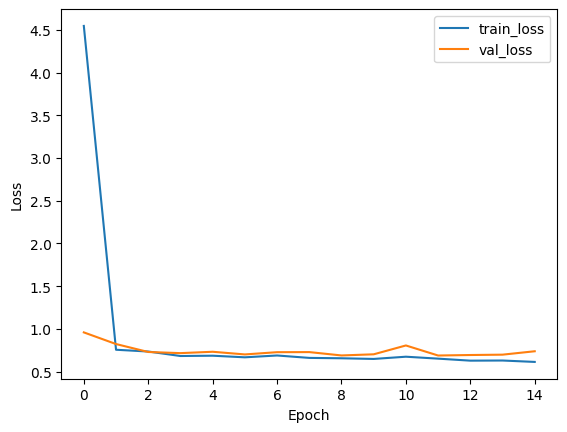

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 506ms/step - accuracy: 0.5100 - auc_8: 0.5248 - auc_9: 0.4403 - false_negatives_4: 28.5556 - false_positives_4: 44.6667 - loss: 0.6913 - precision_4: 0.4536 - recall_4: 0.5659 - true_negatives_4: 37.7778 - true_positives_4: 41.8889
Test Accuracy: 52.92%
Precision: 0.52
Recall: 0.61
AUC-ROC: 0.56
AUC-PR: 0.52
TN: 55.0, FP: 67.0, FN: 46.0, TP: 72.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 581ms/step
Confusion Matrix:
[[55 67]
 [46 72]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.45      0.49       122
           1       0.52      0.61      0.56       118

    accuracy                           0.53       240
   macro avg       0.53      0.53      0.53       240
weighted avg       0.53      0.53      0.53       240

AUC Score: 0.53
Precision: 0.52
Recall: 0.61
F1 Score: 0.56
PR AUC: 0.66
Cohen's Kappa Coefficient: 0.06
Matthews Correlation Coefficient (MCC): 0.06
Balanced Accuracy: 0.53
Time taken: 426.25 seco

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the ResNet model
X_train_resized = preprocess_input(X_train_resized)  # Preprocess input for ResNet

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)
X_test_resized = preprocess_input(X_test_resized)

# Load pre-trained ResNet-50 model without the top layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False

# Define your own classification layers on top of ResNet
model = Sequential([
    resnet,
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,968,961 (285.98 MB)

 Trainable params: 51,381,249 (196.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 955ms/step - accuracy: 0.5165 - auc_10: 0.5188 - auc_11: 0.5090 - false_negatives_5: 113.6129 - false_positives_5: 131.9677 - loss: 8.5237 - precision_5: 0.5206 - recall_5: 0.5778 - true_negatives_5: 119.1290 - true_positives_5: 146.2581 - val_accuracy: 0.5083 - val_auc_10: 0.5264 - val_auc_11: 0.5175 - val_false_negatives_5: 118.0000 - val_false_positives_5: 0.0000e+00 - val_loss: 0.7377 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00 - val_true_negatives_5: 122.0000 - val_true_positives_5: 0.0000e+00
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 920ms/step - accuracy: 0.5492 - auc_10: 0.5777 - auc_11: 0.6006 - false_negatives_5: 111.3871 - false_positives_5: 119.8387 - loss: 0.7103 - precision_5: 0.5748 - recall_5: 0.5695 - true_negatives_5: 124.7097 - true_positives_5: 155.0323 - val_accuracy: 0.5083 - val_auc_10: 0.5420 - val_auc_11: 0.5124 - val_false_negatives_5: 64.0000 - val_false_positives_5: 54.0000 - val_loss: 0.6937 - val_pre

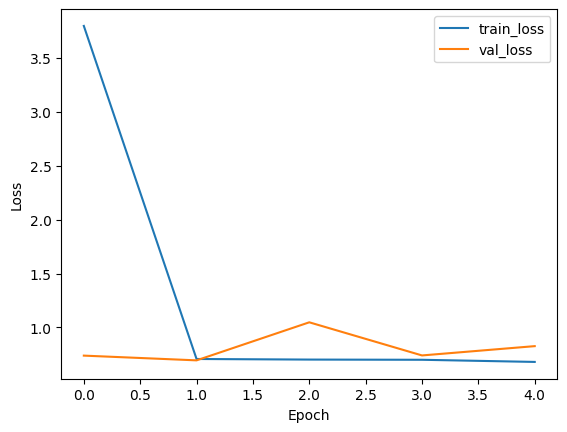

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 509ms/step - accuracy: 0.4693 - auc_10: 0.5029 - auc_11: 0.4288 - false_negatives_5: 42.3333 - false_positives_5: 36.2222 - loss: 0.6944 - precision_5: 0.3873 - recall_5: 0.3570 - true_negatives_5: 46.2222 - true_positives_5: 28.1111
Test Accuracy: 50.83%
Precision: 0.50
Recall: 0.46
AUC-ROC: 0.54
AUC-PR: 0.51
TN: 68.0, FP: 54.0, FN: 64.0, TP: 54.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 581ms/step
Confusion Matrix:
[[68 54]
 [64 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       122
           1       0.50      0.46      0.48       118

    accuracy                           0.51       240
   macro avg       0.51      0.51      0.51       240
weighted avg       0.51      0.51      0.51       240

AUC Score: 0.51
Precision: 0.50
Recall: 0.46
F1 Score: 0.48
PR AUC: 0.61
Cohen's Kappa Coefficient: 0.02
Matthews Correlation Coefficient (MCC): 0.02
Balanced Accuracy: 0.51
Time taken: 151.57 se

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the ResNet model
X_train_resized = preprocess_input(X_train_resized)  # Preprocess input for ResNet

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)
X_test_resized = preprocess_input(X_test_resized)

# Load pre-trained ResNet-50 model without the top layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False

# Define your own classification layers on top of ResNet
model = Sequential([
    resnet,
    Flatten(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# GlobalAveragePooling2D

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 719ms/step - accuracy: 0.5013 - auc_12: 0.5064 - auc_13: 0.5308 - loss: 0.8028 - precision_6: 0.5037 - recall_6: 0.4930 - val_accuracy: 0.5083 - val_auc_12: 0.5251 - val_auc_13: 0.5036 - val_loss: 0.7236 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 678ms/step - accuracy: 0.5295 - auc_12: 0.5432 - auc_13: 0.5420 - loss: 0.7594 - precision_6: 0.5566 - recall_6: 0.3822 - val_accuracy: 0.4833 - val_auc_12: 0.5356 - val_auc_13: 0.5146 - val_loss: 0.6990 - val_precision_6: 0.4864 - val_recall_6: 0.9068
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 678ms/step - accuracy: 0.4913 - auc_12: 0.4972 - auc_13: 0.4975 - loss: 0.7291 - precision_6: 0.4766 - recall_6: 0.4197 - val_accuracy: 0.5083 - val_auc_12: 0.5232 - val_auc_13: 0.4951 - val_loss: 0.6941 - val_precision_6: 0.5000 - val_recall_6: 0.7373
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 677ms/step - accuracy: 0.5549 - auc_12: 0.5654 - auc_13: 0.5683 -

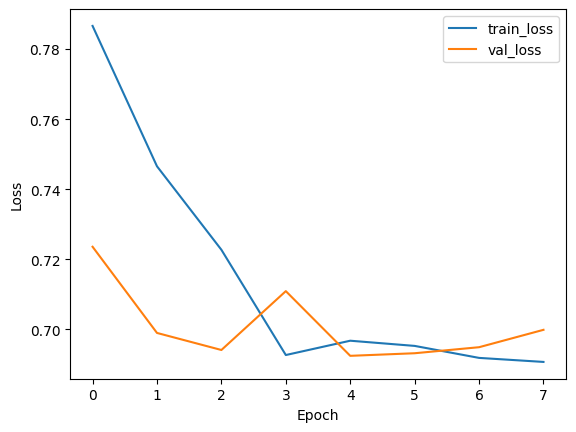

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 573ms/step
Accuracy: 0.52
Precision: 0.51
Recall (Sensitivity): 0.49
F1 Score: 0.50
Specificity: 0.55
Confusion Matrix:
[[67 55]
 [60 58]]
Area Under the ROC Curve (AUC-ROC): 0.52


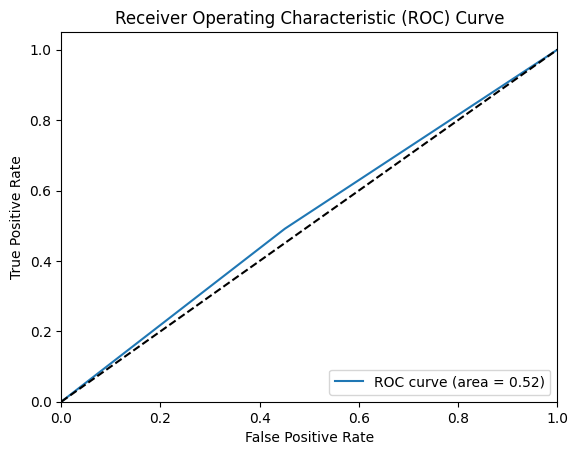

Precision-Recall Curve (AUC-PR): 0.63


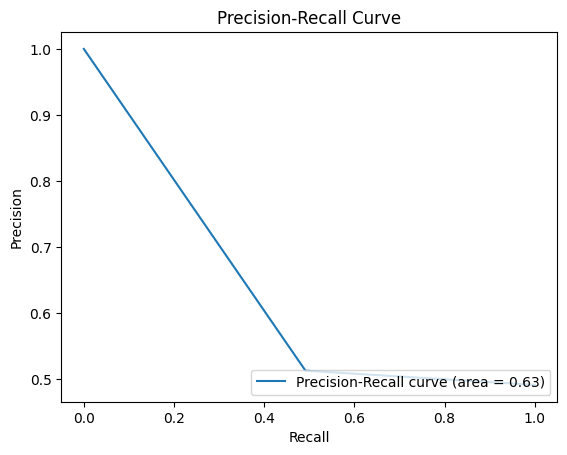

Cohen's Kappa Coefficient: 0.04
Matthews Correlation Coefficient (MCC): 0.04
Balanced Accuracy: 0.52
Time taken: 171.44 seconds


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, accuracy_score, balanced_accuracy_score
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the ResNet model
X_train_resized = preprocess_input(X_train_resized)  # Preprocess input for ResNet

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)
X_test_resized = preprocess_input(X_test_resized)

# Load pre-trained ResNet-50 model without the top layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False

# Define your own classification layers on top of ResNet
model = Sequential([
    resnet,
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_predictions = model.predict(X_test_resized) > 0.5

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, test_predictions)
print(f'Recall (Sensitivity): {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Area Under the ROC Curve (AUC-ROC): {roc_auc:.2f}')
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve and AUC score
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'Precision-Recall Curve (AUC-PR): {pr_auc:.2f}')
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 705ms/step - accuracy: 0.5275 - auc_14: 0.5137 - auc_15: 0.5069 - loss: 0.8163 - precision_7: 0.5288 - recall_7: 0.5225 - val_accuracy: 0.5083 - val_auc_14: 0.5395 - val_auc_15: 0.5076 - val_loss: 0.7108 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 677ms/step - accuracy: 0.4922 - auc_14: 0.5125 - auc_15: 0.5274 - loss: 0.7666 - precision_7: 0.4943 - recall_7: 0.3992 - val_accuracy: 0.5083 - val_auc_14: 0.5287 - val_auc_15: 0.5064 - val_loss: 0.7034 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 678ms/step - accuracy: 0.5056 - auc_14: 0.4820 - auc_15: 0.4668 - loss: 0.7499 - precision_7: 0.4481 - recall_7: 0.3790 - val_accuracy: 0.5000 - val_auc_14: 0.5387 - val_auc_15: 0.5102 - val_loss: 0.7007 - val_precision_7: 0.4958 - val_recall_7: 1.0000
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 676ms/step - accuracy: 0.4976 - auc_14: 0.5150 - auc_

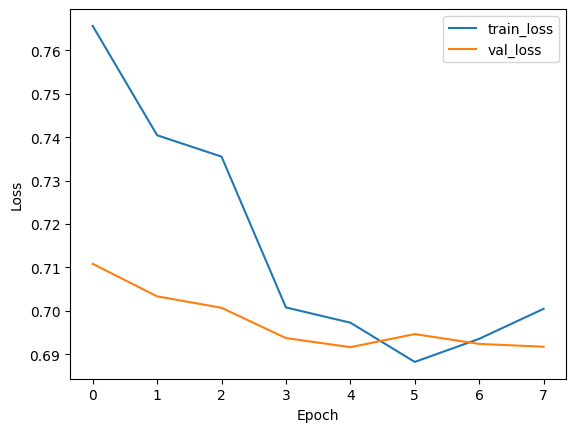

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 570ms/step
Accuracy: 0.54
Precision: 0.53
Recall (Sensitivity): 0.58
F1 Score: 0.56
Specificity: 0.50
Confusion Matrix:
[[61 61]
 [49 69]]
Area Under the ROC Curve (AUC-ROC): 0.54


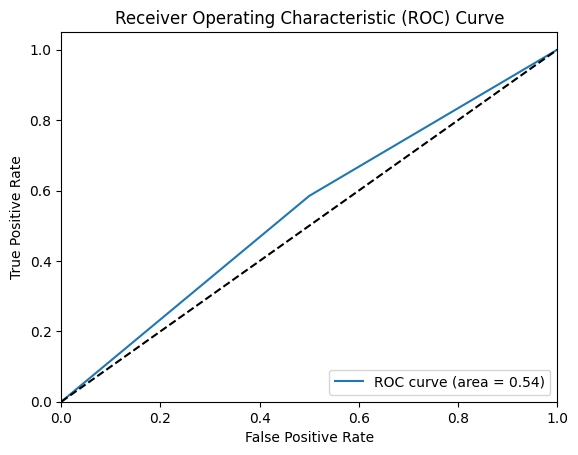

Precision-Recall Curve (AUC-PR): 0.66


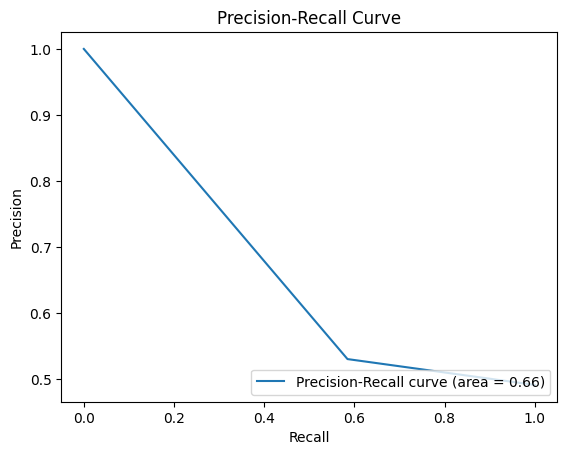

Cohen's Kappa Coefficient: 0.08
Matthews Correlation Coefficient (MCC): 0.09
Balanced Accuracy: 0.54
Time taken: 170.91 seconds


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the ResNet model
X_train_resized = preprocess_input(X_train_resized)  # Preprocess input for ResNet

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)
X_test_resized = preprocess_input(X_test_resized)

# Load pre-trained ResNet-50 model without the top layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False

# Define your own classification layers on top of ResNet
model = Sequential([
    resnet,
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_predictions = model.predict(X_test_resized) > 0.5

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, test_predictions)
print(f'Recall (Sensitivity): {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Area Under the ROC Curve (AUC-ROC): {roc_auc:.2f}')
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve and AUC score
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'Precision-Recall Curve (AUC-PR): {pr_auc:.2f}')
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 707ms/step - accuracy: 0.5142 - auc_16: 0.5042 - auc_17: 0.5248 - loss: 0.8068 - precision_8: 0.5267 - recall_8: 0.5377 - val_accuracy: 0.5375 - val_auc_16: 0.5329 - val_auc_17: 0.5027 - val_loss: 0.6916 - val_precision_8: 0.5267 - val_recall_8: 0.5847
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 677ms/step - accuracy: 0.5059 - auc_16: 0.4904 - auc_17: 0.4912 - loss: 0.7486 - precision_8: 0.5154 - recall_8: 0.5189 - val_accuracy: 0.4917 - val_auc_16: 0.5334 - val_auc_17: 0.4976 - val_loss: 0.7298 - val_precision_8: 0.4917 - val_recall_8: 1.0000
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 676ms/step - accuracy: 0.5105 - auc_16: 0.5080 - auc_17: 0.5147 - loss: 0.7388 - precision_8: 0.5122 - recall_8: 0.6268 - val_accuracy: 0.5083 - val_auc_16: 0.5286 - val_auc_17: 0.4996 - val_loss: 0.6954 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 677ms/step - accuracy: 0.5476 - auc_16: 0.5827 - auc_17: 0.59

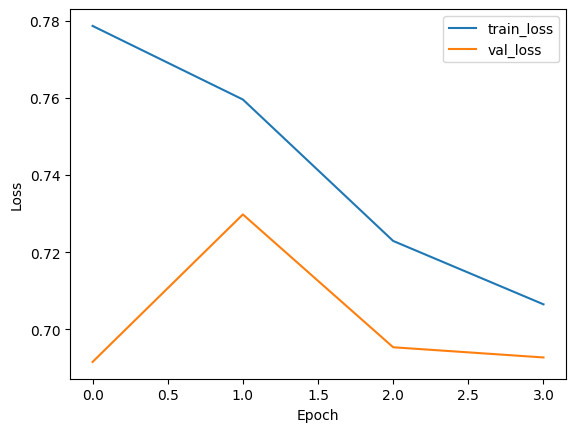

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 571ms/step
Accuracy: 0.54
Precision: 0.53
Recall (Sensitivity): 0.58
F1 Score: 0.55
Specificity: 0.49
Confusion Matrix:
[[60 62]
 [49 69]]
Area Under the ROC Curve (AUC-ROC): 0.54


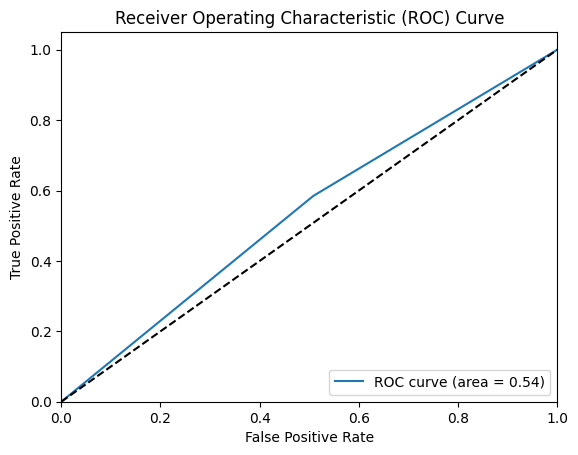

Precision-Recall Curve (AUC-PR): 0.66


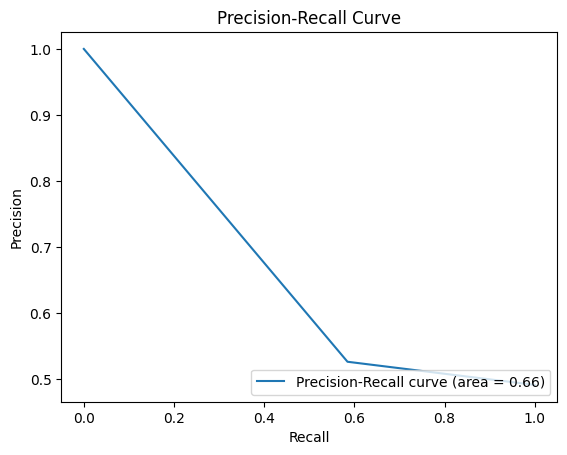

Cohen's Kappa Coefficient: 0.08
Matthews Correlation Coefficient (MCC): 0.08
Balanced Accuracy: 0.54
Time taken: 90.75 seconds


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the ResNet model
X_train_resized = preprocess_input(X_train_resized)  # Preprocess input for ResNet

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)
X_test_resized = preprocess_input(X_test_resized)

# Load pre-trained ResNet-50 model without the top layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False

# Define your own classification layers on top of ResNet
model = Sequential([
    resnet,
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_predictions = model.predict(X_test_resized) > 0.5

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, test_predictions)
print(f'Recall (Sensitivity): {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Area Under the ROC Curve (AUC-ROC): {roc_auc:.2f}')
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve and AUC score
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'Precision-Recall Curve (AUC-PR): {pr_auc:.2f}')
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Conv2D + GlobalAveragePooling2D +Dropout+ Dense Layers

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,768,385 (94.48 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 704ms/step - accuracy: 0.4734 - auc_18: 0.4814 - auc_19: 0.4987 - loss: 0.8519 - precision_9: 0.4584 - recall_9: 0.4215 - val_accuracy: 0.5083 - val_auc_18: 0.4808 - val_auc_19: 0.4754 - val_loss: 0.6932 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 675ms/step - accuracy: 0.4893 - auc_18: 0.5006 - auc_19: 0.4878 - loss: 0.7296 - precision_9: 0.4827 - recall_9: 0.4139 - val_accuracy: 0.5000 - val_auc_18: 0.5026 - val_auc_19: 0.4972 - val_loss: 0.6944 - val_precision_9: 0.4958 - val_recall_9: 0.9915
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 675ms/step - accuracy: 0.5215 - auc_18: 0.5119 - auc_19: 0.4963 - loss: 0.7144 - precision_9: 0.5086 - recall_9: 0.4739 - val_accuracy: 0.4917 - val_auc_18: 0.5124 - val_auc_19: 0.4988 - val_loss: 0.6979 - val_precision_9: 0.4917 - val_recall_9: 1.0000
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 675ms/step - accuracy: 0.5128 - auc_18: 0.5196 - auc_19: 0.5303 -

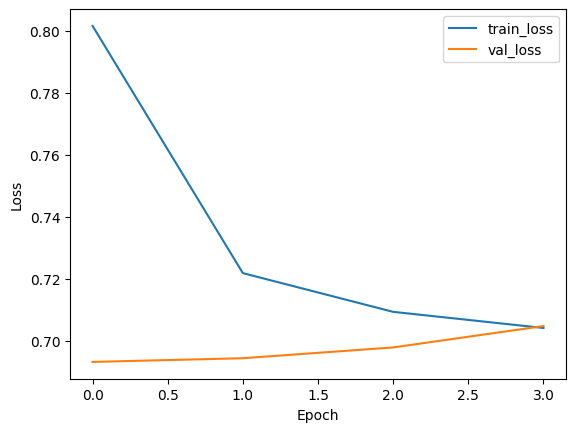

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 571ms/step
Accuracy: 0.51
Precision: 0.00
Recall (Sensitivity): 0.00
F1 Score: 0.00
Specificity: 1.00
Confusion Matrix:
[[122   0]
 [118   0]]
Area Under the ROC Curve (AUC-ROC): 0.50


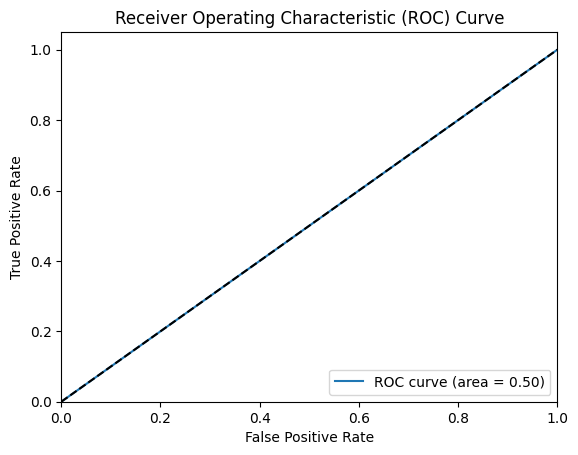

Precision-Recall Curve (AUC-PR): 0.75


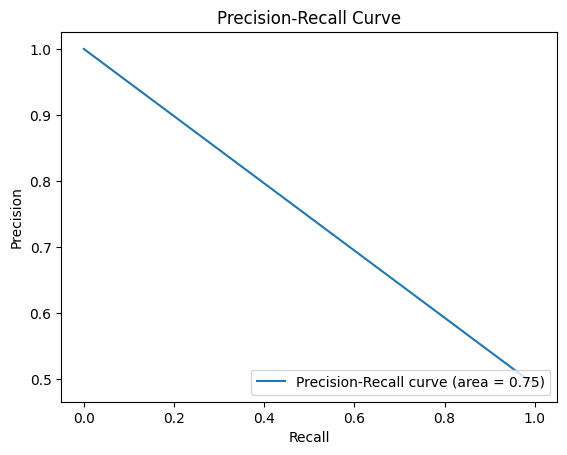

Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Time taken: 90.05 seconds


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, accuracy_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the ResNet model
X_train_resized = preprocess_input(X_train_resized)  # Preprocess input for ResNet

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)
X_test_resized = preprocess_input(X_test_resized)

# Load pre-trained ResNet-50 model without the top layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False

# Define your own classification layers on top of ResNet
model = Sequential([
    resnet,
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_predictions = model.predict(X_test_resized) > 0.5

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, test_predictions)
print(f'Recall (Sensitivity): {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Area Under the ROC Curve (AUC-ROC): {roc_auc:.2f}')
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve and AUC score
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'Precision-Recall Curve (AUC-PR): {pr_auc:.2f}')
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,768,385 (94.48 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 706ms/step - accuracy: 0.4569 - auc_20: 0.4356 - auc_21: 0.4567 - loss: 0.8886 - precision_10: 0.4498 - recall_10: 0.4569 - val_accuracy: 0.4958 - val_auc_20: 0.5440 - val_auc_21: 0.5080 - val_loss: 0.6916 - val_precision_10: 0.2000 - val_recall_10: 0.0085
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 677ms/step - accuracy: 0.5234 - auc_20: 0.5371 - auc_21: 0.5379 - loss: 0.7211 - precision_10: 0.5128 - recall_10: 0.5474 - val_accuracy: 0.5000 - val_auc_20: 0.5345 - val_auc_21: 0.4934 - val_loss: 0.6926 - val_precision_10: 0.4948 - val_recall_10: 0.8051
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 677ms/step - accuracy: 0.5234 - auc_20: 0.5241 - auc_21: 0.5428 - loss: 0.7099 - precision_10: 0.5428 - recall_10: 0.5521 - val_accuracy: 0.5083 - val_auc_20: 0.5337 - val_auc_21: 0.5235 - val_loss: 0.6929 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 677ms/step - accuracy: 0.5092 - auc_20: 0.5092 - 

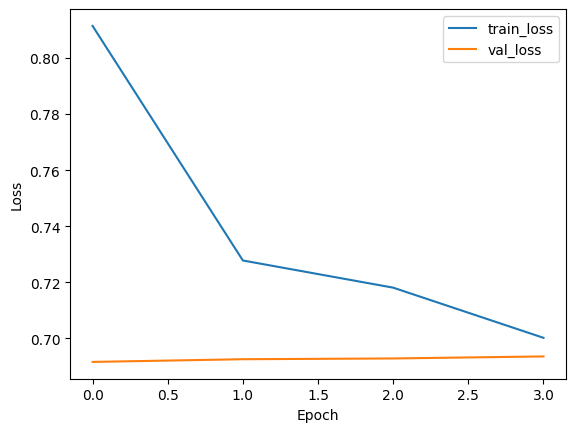

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 572ms/step
Accuracy: 0.50
Precision: 0.20
Recall (Sensitivity): 0.01
F1 Score: 0.02
Specificity: 0.97
Confusion Matrix:
[[118   4]
 [117   1]]
Area Under the ROC Curve (AUC-ROC): 0.49


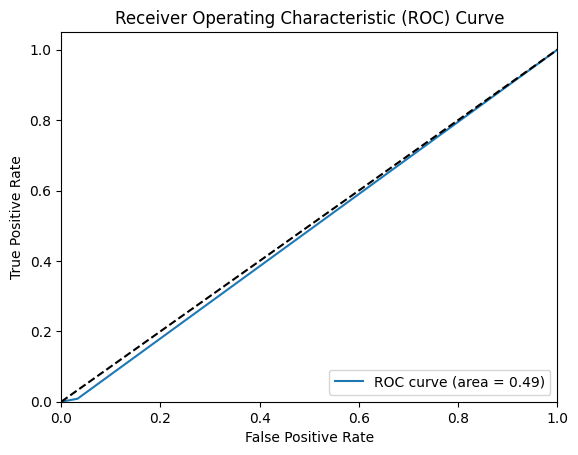

Precision-Recall Curve (AUC-PR): 0.35


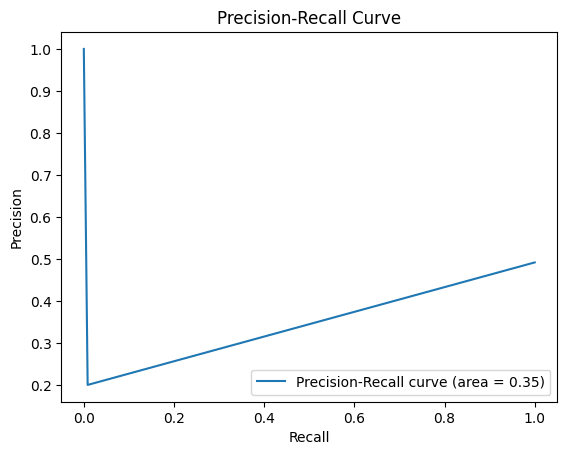

Cohen's Kappa Coefficient: -0.02
Matthews Correlation Coefficient (MCC): -0.09
Balanced Accuracy: 0.49
Time taken: 90.87 seconds


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, accuracy_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the ResNet model
X_train_resized = preprocess_input(X_train_resized)  # Preprocess input for ResNet

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)
X_test_resized = preprocess_input(X_test_resized)

# Load pre-trained ResNet-50 model without the top layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False

# Define your own classification layers on top of ResNet
model = Sequential([
    resnet,
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_predictions = model.predict(X_test_resized) > 0.5

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, test_predictions)
print(f'Recall (Sensitivity): {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Area Under the ROC Curve (AUC-ROC): {roc_auc:.2f}')
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve and AUC score
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'Precision-Recall Curve (AUC-PR): {pr_auc:.2f}')
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,768,385 (94.48 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 706ms/step - accuracy: 0.4573 - auc_22: 0.4836 - auc_23: 0.4939 - loss: 0.8671 - precision_11: 0.4432 - recall_11: 0.4453 - val_accuracy: 0.4917 - val_auc_22: 0.5441 - val_auc_23: 0.5180 - val_loss: 0.7191 - val_precision_11: 0.4917 - val_recall_11: 1.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 678ms/step - accuracy: 0.5129 - auc_22: 0.5131 - auc_23: 0.5136 - loss: 0.7419 - precision_11: 0.5157 - recall_11: 0.5920 - val_accuracy: 0.5083 - val_auc_22: 0.5149 - val_auc_23: 0.5018 - val_loss: 0.6926 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 675ms/step - accuracy: 0.4502 - auc_22: 0.4293 - auc_23: 0.4584 - loss: 0.7385 - precision_11: 0.4344 - recall_11: 0.4073 - val_accuracy: 0.4917 - val_auc_22: 0.5400 - val_auc_23: 0.5228 - val_loss: 0.6968 - val_precision_11: 0.4917 - val_recall_11: 1.0000
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 677ms/step - accuracy: 0.4550 - auc_22: 0.4601 - 

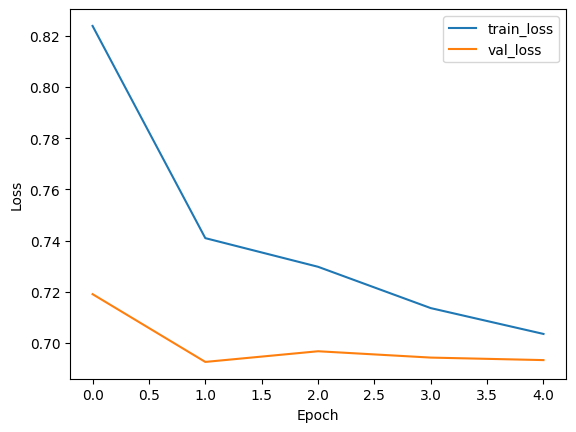

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 571ms/step
Accuracy: 0.51
Precision: 0.00
Recall (Sensitivity): 0.00
F1 Score: 0.00
Specificity: 1.00
Confusion Matrix:
[[122   0]
 [118   0]]
Area Under the ROC Curve (AUC-ROC): 0.50


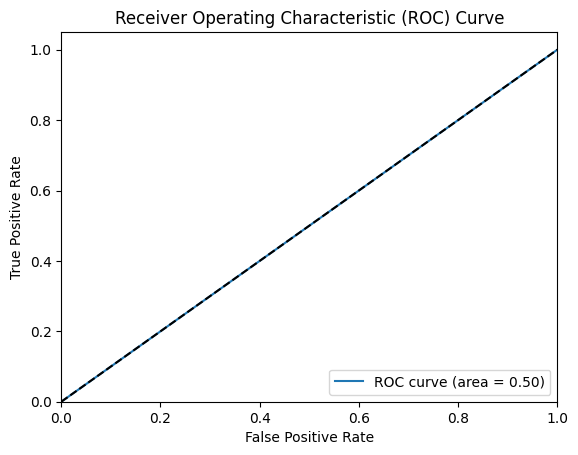

Precision-Recall Curve (AUC-PR): 0.75


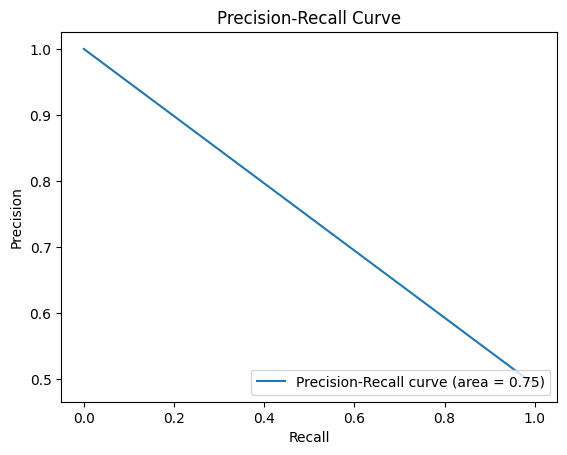

Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Time taken: 110.44 seconds


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, accuracy_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of the ResNet model
X_train_resized = preprocess_input(X_train_resized)  # Preprocess input for ResNet

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)
X_test_resized = preprocess_input(X_test_resized)

# Load pre-trained ResNet-50 model without the top layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False

# Define your own classification layers on top of ResNet
model = Sequential([
    resnet,
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR')])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_predictions = model.predict(X_test_resized) > 0.5

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, test_predictions)
print(f'Recall (Sensitivity): {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Area Under the ROC Curve (AUC-ROC): {roc_auc:.2f}')
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve and AUC score
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'Precision-Recall Curve (AUC-PR): {pr_auc:.2f}')
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# LSTM + Dense Layers

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 100352)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │    51,446,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,042,305 (286.26 MB)

 Trainable params: 51,454,593 (196.28 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 996ms/step - accuracy: 0.4977 - auc_24: 0.4788 - auc_25: 0.4772 - false_negatives_6: 76.2581 - false_positives_6: 175.2581 - loss: 0.8102 - precision_12: 0.4817 - recall_12: 0.7170 - true_negatives_6: 78.5806 - true_positives_6: 180.8710 - val_accuracy: 0.5083 - val_auc_24: 0.5000 - val_auc_25: 0.4917 - val_false_negatives_6: 118.0000 - val_false_positives_6: 0.0000e+00 - val_loss: 0.7011 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00 - val_true_negatives_6: 122.0000 - val_true_positives_6: 0.0000e+00
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 952ms/step - accuracy: 0.4990 - auc_24: 0.4781 - auc_25: 0.4749 - false_negatives_6: 134.0645 - false_positives_6: 120.5484 - loss: 0.6975 - precision_12: 0.3253 - recall_12: 0.3203 - true_negatives_6: 139.4839 - true_positives_6: 116.8710 - val_accuracy: 0.4917 - val_auc_24: 0.5000 - val_auc_25: 0.4917 - val_false_negatives_6: 0.0000e+00 - val_false_positives_6: 122.0000 - val_loss: 0.6954 - v

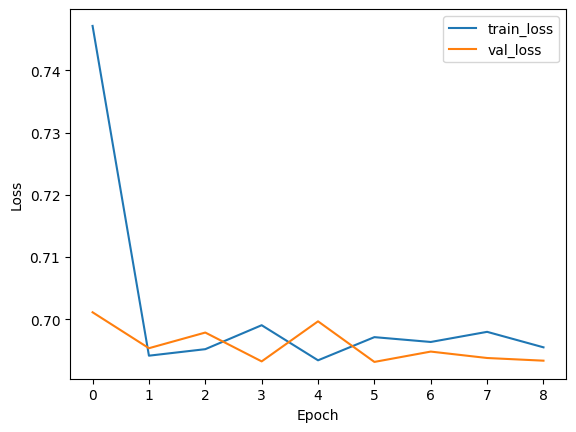

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 507ms/step - accuracy: 0.4423 - auc_24: 0.5000 - auc_25: 0.4423 - false_negatives_6: 0.0000e+00 - false_positives_6: 82.4444 - loss: 0.6933 - precision_12: 0.4423 - recall_12: 1.0000 - true_negatives_6: 0.0000e+00 - true_positives_6: 70.4444
Test Accuracy: 49.17%
Precision: 0.49
Recall: 1.00
AUC-ROC: 0.50
AUC-PR: 0.49
TP: 118.0, FP: 122.0, TN: 0.0, FN: 0.0
Validation Accuracy:
[0.5083333253860474, 0.49166667461395264, 0.5083333253860474, 0.49166667461395264, 0.49166667461395264, 0.49166667461395264, 0.5083333253860474, 0.5083333253860474, 0.5083333253860474]
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 590ms/step
Confusion Matrix:
[[  0 122]
 [  0 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.49      1.00      0.66       118

    accuracy                           0.49       240
   macro avg       0.25      0.50      0.33       240
weighted avg       0.24      0.4

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match ResNet50 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load ResNet50 model without top (no classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers of ResNet50
for layer in base_model.layers:
    layer.trainable = False

# Define the input layer
input_layer = Input(shape=(224, 224, 3))

# Pass the input through ResNet50 model
resnet_output = base_model(input_layer, training=False)

# Flatten the output
flatten = Flatten()(resnet_output)

# Reshape for LSTM
reshape = Reshape((1, -1))(flatten)

# Define the LSTM layer
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Validation accuracy
val_accuracy = history.history['val_accuracy']
print("Validation Accuracy:")
print(val_accuracy)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 1, 100352)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │    51,446,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,042,305 (286.26 MB)

 Trainable params: 51,454,593 (196.28 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 995ms/step - accuracy: 0.5115 - auc_26: 0.4938 - auc_27: 0.5045 - false_negatives_7: 66.5161 - false_positives_7: 177.5806 - loss: 0.8815 - precision_13: 0.5005 - recall_13: 0.7454 - true_negatives_7: 72.8387 - true_positives_7: 194.0323 - val_accuracy: 0.5083 - val_auc_26: 0.5000 - val_auc_27: 0.4917 - val_false_negatives_7: 118.0000 - val_false_positives_7: 0.0000e+00 - val_loss: 0.7157 - val_precision_13: 0.0000e+00 - val_recall_13: 0.0000e+00 - val_true_negatives_7: 122.0000 - val_true_positives_7: 0.0000e+00
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 951ms/step - accuracy: 0.4843 - auc_26: 0.4836 - auc_27: 0.5086 - false_negatives_7: 106.7742 - false_positives_7: 153.4516 - loss: 0.7090 - precision_13: 0.3886 - recall_13: 0.4408 - true_negatives_7: 97.6129 - true_positives_7: 153.1290 - val_accuracy: 0.5083 - val_auc_26: 0.5000 - val_auc_27: 0.4917 - val_false_negatives_7: 118.0000 - val_false_positives_7: 0.0000e+00 - val_loss: 0.6931 - 

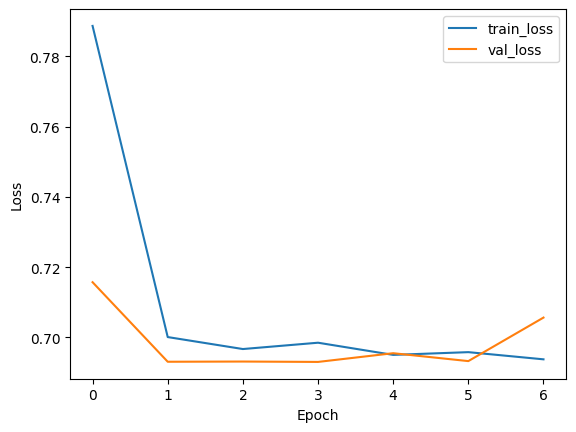

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 505ms/step - accuracy: 0.5577 - auc_26: 0.5000 - auc_27: 0.4423 - false_negatives_7: 70.4444 - false_positives_7: 0.0000e+00 - loss: 0.6906 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - true_negatives_7: 82.4444 - true_positives_7: 0.0000e+00
Test Accuracy: 50.83%
Precision: 0.00
Recall: 0.00
AUC-ROC: 0.50
AUC-PR: 0.49
TP: 0.0, FP: 0.0, TN: 122.0, FN: 118.0
Validation Accuracy:
[0.5083333253860474, 0.5083333253860474, 0.49166667461395264, 0.5083333253860474, 0.49166667461395264, 0.49166667461395264, 0.49166667461395264]
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 594ms/step
Confusion Matrix:
[[122   0]
 [118   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       122
           1       0.00      0.00      0.00       118

    accuracy                           0.51       240
   macro avg       0.25      0.50      0.34       240
weighted avg       0.26      0.51      0.34       240

AUC Score

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match ResNet50 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load ResNet50 model without top (no classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers of ResNet50
for layer in base_model.layers:
    layer.trainable = False

# Define the input layer
input_layer = Input(shape=(224, 224, 3))

# Pass the input through ResNet50 model
resnet_output = base_model(input_layer, training=False)

# Flatten the output
flatten = Flatten()(resnet_output)

# Reshape for LSTM
reshape = Reshape((1, -1))(flatten)

# Define the LSTM layer
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Validation accuracy
val_accuracy = history.history['val_accuracy']
print("Validation Accuracy:")
print(val_accuracy)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 1, 100352)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │    51,446,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,042,305 (286.26 MB)

 Trainable params: 51,454,593 (196.28 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 992ms/step - accuracy: 0.5112 - auc_28: 0.4928 - auc_29: 0.4780 - false_negatives_8: 76.3548 - false_positives_8: 174.4516 - loss: 0.6983 - precision_14: 0.5106 - recall_14: 0.6547 - true_negatives_8: 77.4516 - true_positives_8: 182.7097 - val_accuracy: 0.5083 - val_auc_28: 0.5000 - val_auc_29: 0.4917 - val_false_negatives_8: 118.0000 - val_false_positives_8: 0.0000e+00 - val_loss: 0.6941 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00 - val_true_negatives_8: 122.0000 - val_true_positives_8: 0.0000e+00
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 953ms/step - accuracy: 0.5085 - auc_28: 0.4973 - auc_29: 0.5078 - false_negatives_8: 169.9677 - false_positives_8: 82.9355 - loss: 0.6959 - precision_14: 0.3116 - recall_14: 0.2307 - true_negatives_8: 165.5161 - true_positives_8: 92.5484 - val_accuracy: 0.5083 - val_auc_28: 0.5000 - val_auc_29: 0.4917 - val_false_negatives_8: 118.0000 - val_false_positives_8: 0.0000e+00 - val_loss: 0.6930 - v

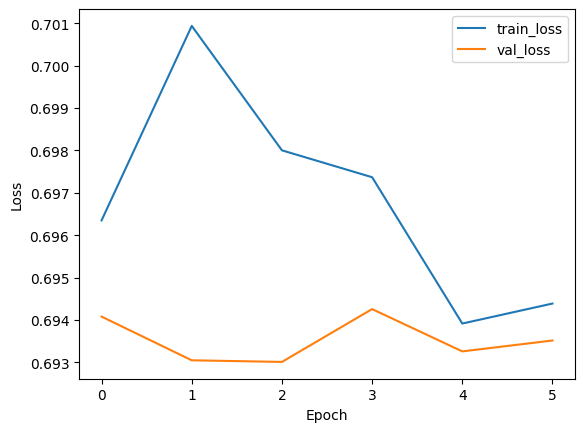

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 506ms/step - accuracy: 0.5577 - auc_28: 0.5000 - auc_29: 0.4423 - false_negatives_8: 70.4444 - false_positives_8: 0.0000e+00 - loss: 0.6913 - precision_14: 0.0000e+00 - recall_14: 0.0000e+00 - true_negatives_8: 82.4444 - true_positives_8: 0.0000e+00
Test Accuracy: 50.83%
Precision: 0.00
Recall: 0.00
AUC-ROC: 0.50
AUC-PR: 0.49
TP: 0.0, FP: 0.0, TN: 122.0, FN: 118.0
Validation Accuracy:
[0.5083333253860474, 0.5083333253860474, 0.5083333253860474, 0.49166667461395264, 0.49166667461395264, 0.49166667461395264]
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 593ms/step
Confusion Matrix:
[[122   0]
 [118   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       122
           1       0.00      0.00      0.00       118

    accuracy                           0.51       240
   macro avg       0.25      0.50      0.34       240
weighted avg       0.26      0.51      0.34       240

AUC Score: 0.50

Precision: 0.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match ResNet50 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load ResNet50 model without top (no classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers of ResNet50
for layer in base_model.layers:
    layer.trainable = False

# Define the input layer
input_layer = Input(shape=(224, 224, 3))

# Pass the input through ResNet50 model
resnet_output = base_model(input_layer, training=False)

# Flatten the output
flatten = Flatten()(resnet_output)

# Reshape for LSTM
reshape = Reshape((1, -1))(flatten)

# Define the LSTM layer
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Validation accuracy
val_accuracy = history.history['val_accuracy']
print("Validation Accuracy:")
print(val_accuracy)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# GRU + Dense Layers

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 1, 36864)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │    14,205,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,593,665 (55.67 MB)

 Trainable params: 14,593,665 (55.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 363ms/step - accuracy: 0.4818 - auc_30: 0.4702 - auc_31: 0.4826 - false_negatives_9: 105.1936 - false_positives_9: 156.8710 - loss: 0.7395 - precision_15: 0.4957 - recall_15: 0.6279 - true_negatives_9: 92.9355 - true_positives_9: 155.9677 - val_accuracy: 0.5083 - val_auc_30: 0.6550 - val_auc_31: 0.6647 - val_false_negatives_9: 118.0000 - val_false_positives_9: 0.0000e+00 - val_loss: 0.6903 - val_precision_15: 0.0000e+00 - val_recall_15: 0.0000e+00 - val_true_negatives_9: 122.0000 - val_true_positives_9: 0.0000e+00
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 344ms/step - accuracy: 0.4734 - auc_30: 0.4736 - auc_31: 0.5065 - false_negatives_9: 89.9355 - false_positives_9: 176.8710 - loss: 0.6967 - precision_15: 0.4417 - recall_15: 0.5132 - true_negatives_9: 72.2581 - true_positives_9: 171.9032 - val_accuracy: 0.4917 - val_auc_30: 0.5000 - val_auc_31: 0.4917 - val_false_negatives_9: 0.0000e+00 - val_false_positives_9: 122.0000 - val_loss: 0.6931 - va

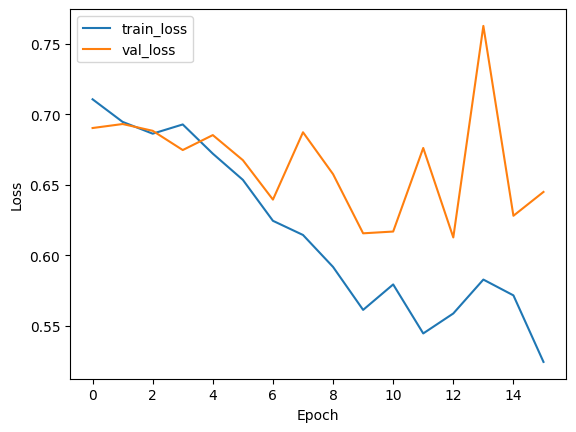

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.6781 - auc_30: 0.7121 - auc_31: 0.6863 - false_negatives_9: 36.0000 - false_positives_9: 14.5556 - loss: 0.6278 - precision_15: 0.6924 - recall_15: 0.4875 - true_negatives_9: 67.8889 - true_positives_9: 34.4444
Test Accuracy: 67.08%
Precision: 0.75
Recall: 0.50
AUC-ROC: 0.72
AUC-PR: 0.74
TP: 59.0, FP: 20.0, TN: 102.0, FN: 59.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
Confusion Matrix:
[[102  20]
 [ 59  59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.84      0.72       122
           1       0.75      0.50      0.60       118

    accuracy                           0.67       240
   macro avg       0.69      0.67      0.66       240
weighted avg       0.69      0.67      0.66       240

AUC Score: 0.67

Precision: 0.7468354430379747
Recall: 0.5
F1 Score: 0.5989847715736041
Time taken: 168.59 seconds


In [ ]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GRU, Dense, Reshape
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),  # Convolutional layer with 32 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer with 128 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(256, (3, 3), activation='relu'),  # Convolutional layer with 256 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(1, activation='sigmoid')  # Dense layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 1, 36864)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │    14,205,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,593,665 (55.67 MB)

 Trainable params: 14,593,665 (55.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 360ms/step - accuracy: 0.4882 - auc_32: 0.4990 - auc_33: 0.4980 - false_negatives_10: 149.6774 - false_positives_10: 111.6452 - loss: 0.8273 - precision_16: 0.4881 - recall_16: 0.4698 - true_negatives_10: 143.3226 - true_positives_10: 106.3226 - val_accuracy: 0.5083 - val_auc_32: 0.6326 - val_auc_33: 0.6224 - val_false_negatives_10: 118.0000 - val_false_positives_10: 0.0000e+00 - val_loss: 0.6915 - val_precision_16: 0.0000e+00 - val_recall_16: 0.0000e+00 - val_true_negatives_10: 122.0000 - val_true_positives_10: 0.0000e+00
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 347ms/step - accuracy: 0.5048 - auc_32: 0.5707 - auc_33: 0.5993 - false_negatives_10: 242.4194 - false_positives_10: 8.2258 - loss: 0.6914 - precision_16: 0.5314 - recall_16: 0.0264 - true_negatives_10: 248.3226 - true_positives_10: 12.0000 - val_accuracy: 0.4917 - val_auc_32: 0.4923 - val_auc_33: 0.4851 - val_false_negatives_10: 0.0000e+00 - val_false_positives_10: 122.0000 - val_l

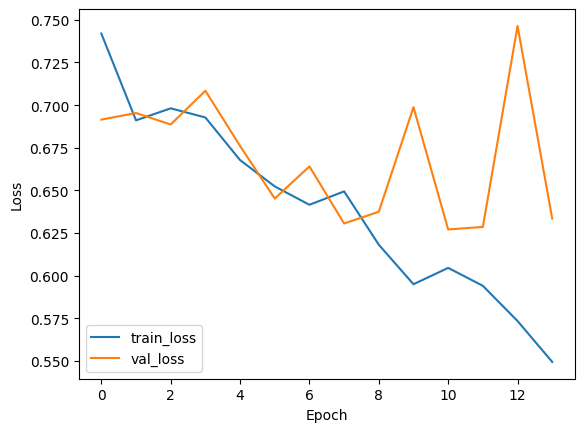

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.6414 - auc_32: 0.6555 - auc_33: 0.6510 - false_negatives_10: 32.1111 - false_positives_10: 23.7778 - loss: 0.6391 - precision_16: 0.6073 - recall_16: 0.5376 - true_negatives_10: 58.6667 - true_positives_10: 38.3333
Test Accuracy: 63.75%
Precision: 0.66
Recall: 0.55
AUC-ROC: 0.67
AUC-PR: 0.72
TP: 65.0, FP: 34.0, TN: 88.0, FN: 53.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step
Confusion Matrix:
[[88 34]
 [53 65]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.72      0.67       122
           1       0.66      0.55      0.60       118

    accuracy                           0.64       240
   macro avg       0.64      0.64      0.63       240
weighted avg       0.64      0.64      0.63       240

AUC Score: 0.64

Precision: 0.6565656565656566
Recall: 0.5508474576271186
F1 Score: 0.599078341013825
Time taken: 149.70 seconds


In [ ]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GRU, Dense, Reshape
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),  # Convolutional layer with 32 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer with 128 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(256, (3, 3), activation='relu'),  # Convolutional layer with 256 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(1, activation='sigmoid')  # Dense layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 1, 36864)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 128)            │    14,205,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,593,665 (55.67 MB)

 Trainable params: 14,593,665 (55.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 361ms/step - accuracy: 0.5111 - auc_34: 0.4663 - auc_35: 0.4766 - false_negatives_11: 117.8710 - false_positives_11: 131.4839 - loss: 1.0414 - precision_17: 0.5158 - recall_17: 0.6103 - true_negatives_11: 122.5484 - true_positives_11: 139.0645 - val_accuracy: 0.4917 - val_auc_34: 0.5777 - val_auc_35: 0.5803 - val_false_negatives_11: 0.0000e+00 - val_false_positives_11: 122.0000 - val_loss: 0.6948 - val_precision_17: 0.4917 - val_recall_17: 1.0000 - val_true_negatives_11: 0.0000e+00 - val_true_positives_11: 118.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 349ms/step - accuracy: 0.5370 - auc_34: 0.5250 - auc_35: 0.5454 - false_negatives_11: 98.3226 - false_positives_11: 143.5484 - loss: 0.6919 - precision_17: 0.5371 - recall_17: 0.6878 - true_negatives_11: 108.5161 - true_positives_11: 160.5806 - val_accuracy: 0.5625 - val_auc_34: 0.7023 - val_auc_35: 0.7199 - val_false_negatives_11: 103.0000 - val_false_positives_11: 2.0000 - val_loss: 0.678

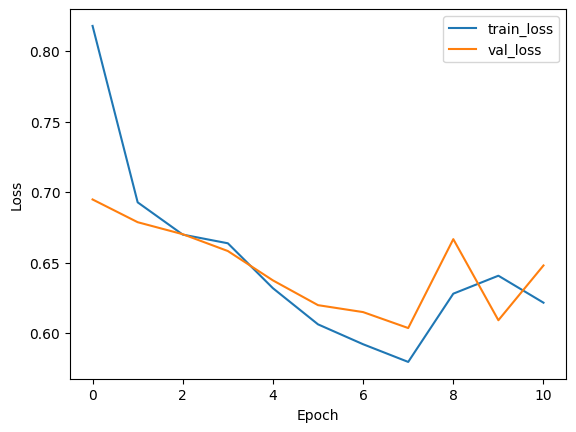

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6593 - auc_34: 0.7030 - auc_35: 0.6785 - false_negatives_11: 29.1111 - false_positives_11: 23.5556 - loss: 0.6246 - precision_17: 0.6203 - recall_17: 0.5886 - true_negatives_11: 58.8889 - true_positives_11: 41.3333
Test Accuracy: 65.83%
Precision: 0.68
Recall: 0.58
AUC-ROC: 0.71
AUC-PR: 0.75
TP: 69.0, FP: 33.0, TN: 89.0, FN: 49.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
Confusion Matrix:
[[89 33]
 [49 69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68       122
           1       0.68      0.58      0.63       118

    accuracy                           0.66       240
   macro avg       0.66      0.66      0.66       240
weighted avg       0.66      0.66      0.66       240

AUC Score: 0.66

Precision: 0.6764705882352942
Recall: 0.5847457627118644
F1 Score: 0.6272727272727273
Time taken: 118.40 seconds


In [ ]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GRU, Dense, Reshape
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),  # Convolutional layer with 32 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer with 128 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(256, (3, 3), activation='relu'),  # Convolutional layer with 256 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(1, activation='sigmoid')  # Dense layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Attention mechanism

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_33      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 222, 222,  │        320 │ input_layer_33[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 111, 111,  │          0 │ conv2d_12[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 109, 109,  │     18,496 │ max_pooling2d_12… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 54, 54,    │          0 │ conv2d_13[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 52, 52,    │     73,856 │ max_pooling2d_13… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 26, 26,    │          0 │ conv2d_14[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_12          │ (None, 86528)     │          0 │ max_pooling2d_14… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_36 (Dense)    │ (None, 256)       │ 22,151,424 │ flatten_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_37 (Dense)    │ (None, 512)       │    131,584 │ dense_36[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_probs     │ (None, 512)       │    262,656 │ dense_37[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 512)       │          0 │ dense_37[0][0],   │
│                     │                   │            │ attention_probs[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_38 (Dense)    │ (None, 1)         │        513 │ multiply[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 22,638,849 (86.36 MB)

 Trainable params: 22,638,849 (86.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 366ms/step - accuracy: 0.5033 - loss: 0.6941 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - accuracy: 0.4928 - loss: 0.6938 - val_accuracy: 0.4875 - val_loss: 0.6931
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 337ms/step - accuracy: 0.5262 - loss: 0.6943 - val_accuracy: 0.4917 - val_loss: 0.6933
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 337ms/step - accuracy: 0.5018 - loss: 0.6932 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 338ms/step - accuracy: 0.5083 - loss: 0.6931 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


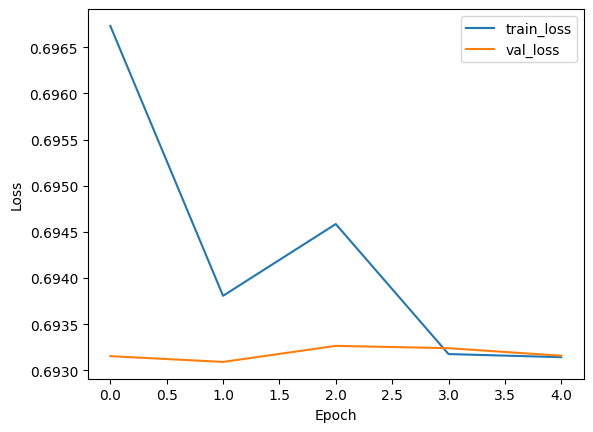

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.4317 - loss: 0.6932
Test Accuracy: 48.75%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Confusion Matrix:
[[  1 121]
 [  2 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.01      0.02       122
           1       0.49      0.98      0.65       118

    accuracy                           0.49       240
   macro avg       0.41      0.50      0.33       240
weighted avg       0.41      0.49      0.33       240

AUC Score: 0.50

Precision: 0.48945147679324896
Recall: 0.9830508474576272
F1 Score: 0.6535211267605634
Cohen's Kappa Coefficient: -0.01
Matthews Correlation Coefficient (MCC): -0.04
Balanced Accuracy: 0.50
Time taken: 53.66 seconds


In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Multiply
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define the custom CNN architecture with attention mechanism
input_layer = Input(shape=(224, 224, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
attention_probs = Dense(np.prod(x.shape[1:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
output = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_34      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 222, 222,  │        320 │ input_layer_34[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 111, 111,  │          0 │ conv2d_15[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 109, 109,  │     18,496 │ max_pooling2d_15… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 54, 54,    │          0 │ conv2d_16[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 52, 52,    │     73,856 │ max_pooling2d_16… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_17    │ (None, 26, 26,    │          0 │ conv2d_17[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_13          │ (None, 86528)     │          0 │ max_pooling2d_17… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_39 (Dense)    │ (None, 256)       │ 22,151,424 │ flatten_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 512)       │    131,584 │ dense_39[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_probs     │ (None, 512)       │    262,656 │ dense_40[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 512)       │          0 │ dense_40[0][0],   │
│ (Multiply)          │                   │            │ attention_probs[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 1)         │        513 │ multiply_1[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 22,638,849 (86.36 MB)

 Trainable params: 22,638,849 (86.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 343ms/step - accuracy: 0.4785 - loss: 0.6938 - val_accuracy: 0.5083 - val_loss: 0.6931
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 338ms/step - accuracy: 0.4814 - loss: 0.6932 - val_accuracy: 0.5083 - val_loss: 0.6929
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - accuracy: 0.4957 - loss: 0.6932 - val_accuracy: 0.5458 - val_loss: 0.6924
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 338ms/step - accuracy: 0.4809 - loss: 0.6927 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 338ms/step - accuracy: 0.5076 - loss: 0.6944 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 338ms/step - accuracy: 0.4819 - loss: 0.6933 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


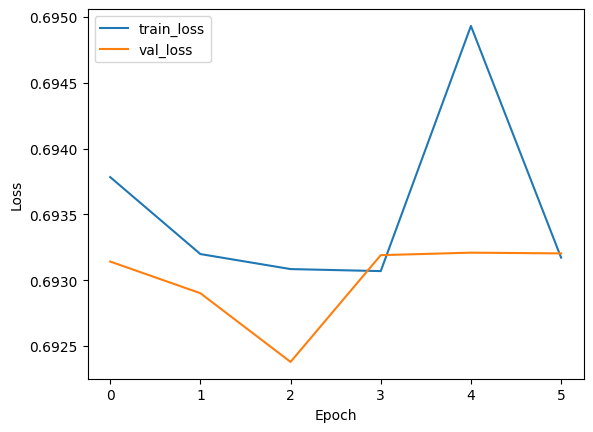

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5899 - loss: 0.6921
Test Accuracy: 54.58%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Confusion Matrix:
[[122   0]
 [109   9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.69       122
           1       1.00      0.08      0.14       118

    accuracy                           0.55       240
   macro avg       0.76      0.54      0.42       240
weighted avg       0.76      0.55      0.42       240

AUC Score: 0.54

Precision: 1.0
Recall: 0.07627118644067797
F1 Score: 0.14173228346456693
Cohen's Kappa Coefficient: 0.08
Matthews Correlation Coefficient (MCC): 0.20
Balanced Accuracy: 0.54
Time taken: 63.19 seconds


In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Multiply
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define the custom CNN architecture with attention mechanism
input_layer = Input(shape=(224, 224, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
attention_probs = Dense(np.prod(x.shape[1:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
output = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_35      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 222, 222,  │        320 │ input_layer_35[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_18    │ (None, 111, 111,  │          0 │ conv2d_18[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 109, 109,  │     18,496 │ max_pooling2d_18… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_19    │ (None, 54, 54,    │          0 │ conv2d_19[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 52, 52,    │     73,856 │ max_pooling2d_19… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_20    │ (None, 26, 26,    │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_14          │ (None, 86528)     │          0 │ max_pooling2d_20… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 256)       │ 22,151,424 │ flatten_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_43 (Dense)    │ (None, 512)       │    131,584 │ dense_42[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_probs     │ (None, 512)       │    262,656 │ dense_43[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_2          │ (None, 512)       │          0 │ dense_43[0][0],   │
│ (Multiply)          │                   │            │ attention_probs[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_44 (Dense)    │ (None, 1)         │        513 │ multiply_2[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 22,638,849 (86.36 MB)

 Trainable params: 22,638,849 (86.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 344ms/step - accuracy: 0.5117 - loss: 0.6932 - val_accuracy: 0.5917 - val_loss: 0.6930
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 340ms/step - accuracy: 0.5680 - loss: 0.6874 - val_accuracy: 0.4917 - val_loss: 0.6933
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 337ms/step - accuracy: 0.5066 - loss: 0.6935 - val_accuracy: 0.4917 - val_loss: 0.6842
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 340ms/step - accuracy: 0.5667 - loss: 0.6846 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - accuracy: 0.5144 - loss: 0.6930 - val_accuracy: 0.4917 - val_loss: 0.6933
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 340ms/step - accuracy: 0.5249 - loss: 0.6929 - val_accuracy: 0.4917 - val_loss: 0.6933
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


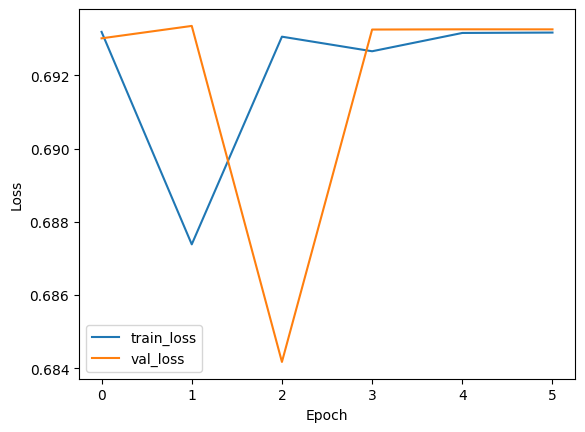

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.4423 - loss: 0.6920
Test Accuracy: 49.17%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
Confusion Matrix:
[[  0 122]
 [  0 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.49      1.00      0.66       118

    accuracy                           0.49       240
   macro avg       0.25      0.50      0.33       240
weighted avg       0.24      0.49      0.32       240

AUC Score: 0.50

Precision: 0.49166666666666664
Recall: 1.0
F1 Score: 0.659217877094972
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Time taken: 63.38 seconds


In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Multiply
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)

# Define the custom CNN architecture with attention mechanism
input_layer = Input(shape=(224, 224, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
attention_probs = Dense(np.prod(x.shape[1:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
output = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Capsule Network

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_37 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capsule_layer (CapsuleLayer)    │ (None, 160)            │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,453,537 (139.06 MB)

 Trainable params: 12,865,825 (49.08 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 785ms/step - accuracy: 0.5038 - loss: 0.6974 - val_accuracy: 0.5000 - val_loss: 0.7035
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 547ms/step - accuracy: 0.5556 - loss: 0.6898 - val_accuracy: 0.5000 - val_loss: 0.7062
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 562ms/step - accuracy: 0.5629 - loss: 0.6853 - val_accuracy: 0.5000 - val_loss: 0.7024
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 556ms/step - accuracy: 0.5712 - loss: 0.6833 - val_accuracy: 0.5000 - val_loss: 0.7012
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 552ms/step - accuracy: 0.5743 - loss: 0.6819 - val_accuracy: 0.5000 - val_loss: 0.6981
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 555ms/step - accuracy: 0.5285 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6955
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 554ms/step - accuracy: 0.5379 - loss: 0.6903 - val_accuracy: 0.5000 - val_loss: 0.6951
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 556ms/step - accuracy: 0.5577 - loss: 0.6878 - val_accuracy: 0.5000 - val_loss:

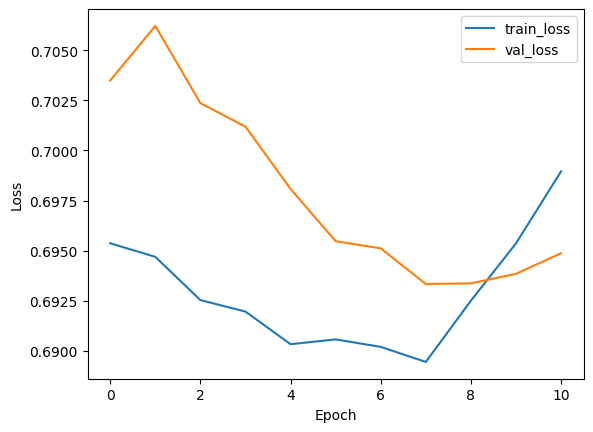

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5000 - loss: 0.6933
Test Accuracy: 50.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step
Confusion Matrix:
[[10  0]
 [10  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20

AUC Score: 0.50

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohen's Kappa Coefficient: 0.0
Matthews Correlation Coefficient (MCC): 0.0
Balanced Accuracy: 0.5
Model predictions saved to: model_predictions.csv
Time taken: 29.78 seconds


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, Dense, Flatten, Input, Reshape
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import csv
from tensorflow.keras.applications import ResNet50

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Placeholder data - replace with your actual training and testing data
X_train = np.random.rand(100, 224, 224, 3)  # Example training data with shape (100, 224, 224, 3)
y_train = np.random.randint(0, 2, size=100)  # Example training labels (binary)
X_test = np.random.rand(20, 224, 224, 3)  # Example testing data with shape (20, 224, 224, 3)
y_test = np.random.randint(0, 2, size=20)  # Example testing labels (binary)

# Load pre-trained ResNet50 model without top layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the ResNet50 layers
for layer in resnet_base.layers:
    layer.trainable = False

# Define the custom Capsule Network layer
input_tensor = Input(shape=(224, 224, 3))
resnet_output = resnet_base(input_tensor)
flatten = Flatten()(resnet_output)
x = Dense(128, activation='relu')(flatten)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print Precision, Recall, F1 Score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# Save the model predictions to a CSV file
csv_file = "model_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['True_Label', 'Predicted_Label'])
    writer.writerows(zip(y_test, test_predictions))

print("Model predictions saved to:", csv_file)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_39 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capsule_layer_1 (CapsuleLayer)  │ (None, 160)            │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,453,537 (139.06 MB)

 Trainable params: 12,865,825 (49.08 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 779ms/step - accuracy: 0.4875 - loss: 0.7127 - val_accuracy: 0.4000 - val_loss: 0.7232
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 562ms/step - accuracy: 0.4875 - loss: 0.7018 - val_accuracy: 0.4000 - val_loss: 0.6967
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 565ms/step - accuracy: 0.4691 - loss: 0.6935 - val_accuracy: 0.6000 - val_loss: 0.6878
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 565ms/step - accuracy: 0.4823 - loss: 0.6945 - val_accuracy: 0.6000 - val_loss: 0.6843
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 555ms/step - accuracy: 0.5177 - loss: 0.6936 - val_accuracy: 0.6000 - val_loss: 0.6813
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 546ms/step - accuracy: 0.5104 - loss: 0.6937 - val_accuracy: 0.6000 - val_loss: 0.6845
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 546ms/step - accuracy: 0.5156 - loss: 0.6928 - val_accuracy: 0.6000 - val_loss: 0.6855
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 548ms/step - accuracy: 0.5083 - loss: 0.6931 - val_accuracy: 0.6000 - v

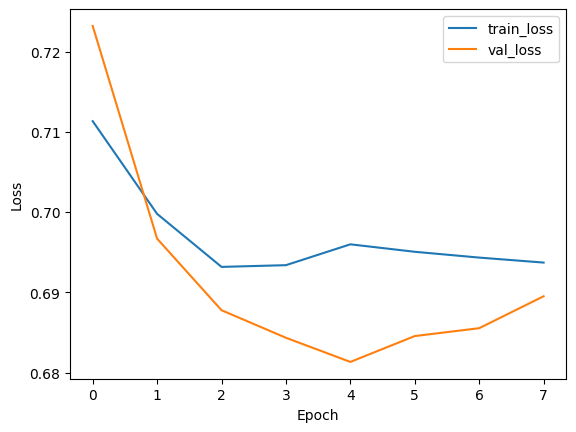

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6000 - loss: 0.6813
Test Accuracy: 60.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step
Confusion Matrix:
[[12  0]
 [ 8  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        12
           1       0.00      0.00      0.00         8

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.37        20
weighted avg       0.36      0.60      0.45        20

AUC Score: 0.50

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohen's Kappa Coefficient: 0.0
Matthews Correlation Coefficient (MCC): 0.0
Balanced Accuracy: 0.5
Model predictions saved to: model_predictions.csv
Time taken: 23.12 seconds


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, Dense, Flatten, Input, Reshape
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import csv
from tensorflow.keras.applications import ResNet50

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Placeholder data - replace with your actual training and testing data
X_train = np.random.rand(100, 224, 224, 3)  # Example training data with shape (100, 224, 224, 3)
y_train = np.random.randint(0, 2, size=100)  # Example training labels (binary)
X_test = np.random.rand(20, 224, 224, 3)  # Example testing data with shape (20, 224, 224, 3)
y_test = np.random.randint(0, 2, size=20)  # Example testing labels (binary)

# Load pre-trained ResNet50 model without top layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the ResNet50 layers
for layer in resnet_base.layers:
    layer.trainable = False

# Define the custom Capsule Network layer
input_tensor = Input(shape=(224, 224, 3))
resnet_output = resnet_base(input_tensor)
flatten = Flatten()(resnet_output)
x = Dense(128, activation='relu')(flatten)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print Precision, Recall, F1 Score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# Save the model predictions to a CSV file
csv_file = "model_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['True_Label', 'Predicted_Label'])
    writer.writerows(zip(y_test, test_predictions))

print("Model predictions saved to:", csv_file)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_41 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_8 (Reshape)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capsule_layer_2 (CapsuleLayer)  │ (None, 160)            │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,453,537 (139.06 MB)

 Trainable params: 12,865,825 (49.08 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 783ms/step - accuracy: 0.5184 - loss: 0.6979 - val_accuracy: 0.6500 - val_loss: 0.6681
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 549ms/step - accuracy: 0.5299 - loss: 0.6906 - val_accuracy: 0.3500 - val_loss: 0.7015
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 546ms/step - accuracy: 0.5045 - loss: 0.6973 - val_accuracy: 0.3500 - val_loss: 0.7270
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 546ms/step - accuracy: 0.4899 - loss: 0.7008 - val_accuracy: 0.3500 - val_loss: 0.7302
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


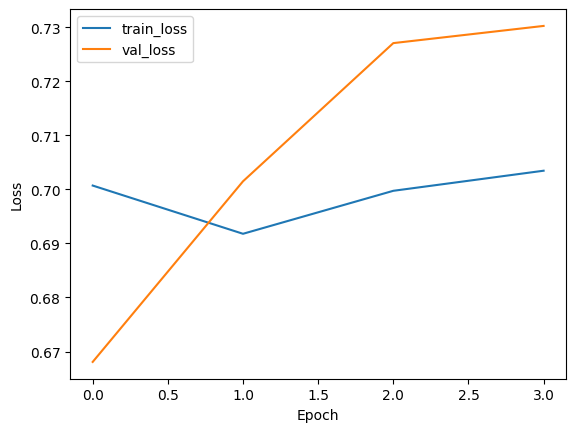

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.6500 - loss: 0.6681
Test Accuracy: 65.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step
Confusion Matrix:
[[13  0]
 [ 7  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       0.00      0.00      0.00         7

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20

AUC Score: 0.50

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohen's Kappa Coefficient: 0.0
Matthews Correlation Coefficient (MCC): 0.0
Balanced Accuracy: 0.5
Model predictions saved to: model_predictions.csv
Time taken: 14.79 seconds


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, Dense, Flatten, Input, Reshape
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import csv
from tensorflow.keras.applications import ResNet50

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Placeholder data - replace with your actual training and testing data
X_train = np.random.rand(100, 224, 224, 3)  # Example training data with shape (100, 224, 224, 3)
y_train = np.random.randint(0, 2, size=100)  # Example training labels (binary)
X_test = np.random.rand(20, 224, 224, 3)  # Example testing data with shape (20, 224, 224, 3)
y_test = np.random.randint(0, 2, size=20)  # Example testing labels (binary)

# Load pre-trained ResNet50 model without top layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the ResNet50 layers
for layer in resnet_base.layers:
    layer.trainable = False

# Define the custom Capsule Network layer
input_tensor = Input(shape=(224, 224, 3))
resnet_output = resnet_base(input_tensor)
flatten = Flatten()(resnet_output)
x = Dense(128, activation='relu')(flatten)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print Precision, Recall, F1 Score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# Save the model predictions to a CSV file
csv_file = "model_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['True_Label', 'Predicted_Label'])
    writer.writerows(zip(y_test, test_predictions))

print("Model predictions saved to:", csv_file)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")
